# Hydroshare Graph Explorer

Exploring the hydroshare graph leveraging off the wowk at https://derwen.ai/docs/kgl/ex6_1/


In [3]:
import kglab
from os.path import dirname
import os
import igraph as ig
import leidenalg as la
from networkx.algorithms import bipartite

In [15]:
ns = {
    "nom":  "http://example.org/#",
    "schema" : "https://schema.org/",
    "hydroshare": "https://www.hydroshare.org/",
    "skos": "http://www.w3.org/2004/02/skos/core#",
    "rdf": "http://www.w3.org/1999/02/22-rdf-syntax-ns#"
}

kg = kglab.KnowledgeGraph(
    name = "Hydroshare graph Sept 23rd 2021",
    base_uri = "https://www.hydroshare.org/",
    namespaces = ns,
    use_gpus=False   ## Need to turn off GPU here due to 
)

kg.load_rdf("./data/hydroshare_graph.ttl")

In [7]:
testnamespaces = {
    "nom":  "http://example.org/#",
    "wtm":  "http://purl.org/heals/food/",
    "ind":  "http://purl.org/heals/ingredient/",
    "skos": "http://www.w3.org/2004/02/skos/core#",
}

testkg = kglab.KnowledgeGraph(
    name = "A recipe KG example based on Food.com",
    base_uri = "https://www.food.com/recipe/",
    namespaces = testnamespaces,
    use_gpus=False
)

testkg.load_rdf("./data/recipes.ttl") ;

In [8]:
# ?s rdf:type <https://schema.org/Dataset>  .

testsparql = """
    SELECT ?subject ?object
    WHERE {
        ?subject rdf:type wtm:Recipe .
        ?subject wtm:hasIngredient ?object .
    }
    """

sparql = """
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

SELECT *
  WHERE {
      ?s ?p ?o 
  }
"""

sparql2 = """
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX schema: <https://schema.org/>

SELECT ?subject ?object
  WHERE {
      ?subject rdf:type schema:Dataset  .
      ?subject schema:keywords ?object .
  }
  LIMIT 14000
"""

sparql2v2 = """
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX schema: <https://schema.org/>

SELECT ?subject ?object
  WHERE {
      ?s rdf:type schema:Dataset  .
      ?s schema:url ?object  .
      ?s schema:keywords ?subject .
  }
  LIMIT 4000
  """

sparql3 = """
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

SELECT ?s ?p ?o
  WHERE {
      BIND (<https://www.hydroshare.org/resource/aefabd0a6d7d47ebaa32e2fb293c9f8a#schemaorg> AS ?s)
      ?s ?p ?o
  }
  """

## What would a plot look like

In [12]:
import igraph as ig 

subgraph = kglab.SubgraphMatrix(kg, sparql2v2)
ig_graph = subgraph.build_ig_graph(ig.Graph())
component = ig_graph.components().subgraph(0)
partition = la.find_partition(component, la.ModularityVertexPartition)

In [13]:
ig_graph.vs[0].attributes()


{'name': 'http://dx.doi.org/10.13039/100000001',
 'label': 'http://dx.doi.org/10.13039/100000001'}

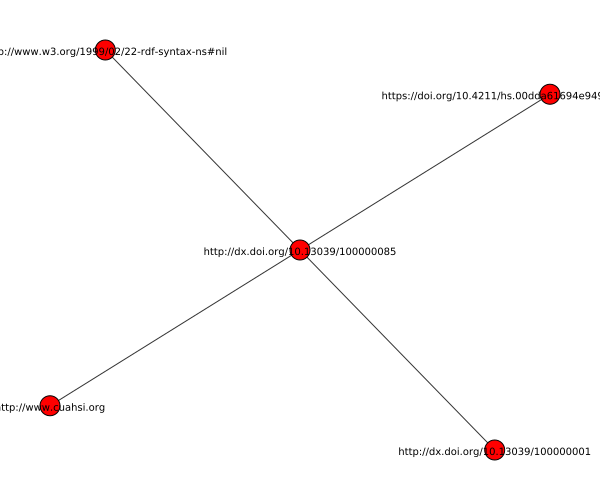

In [14]:
ig.plot(partition, bbox=(600, 500), vertex_label_size=10, margin=50)


##  Inspiration

This is from https://derwen.ai/docs/kgl/ex6_1/

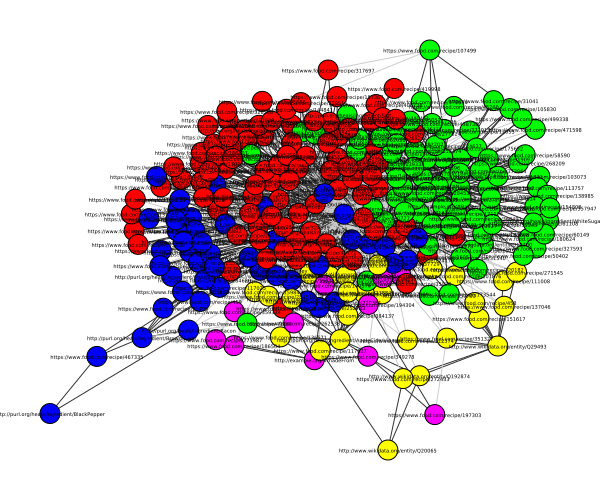

In [10]:
import igraph as ig

testsubgraph = kglab.SubgraphMatrix(testkg, testsparql)
testig_graph = testsubgraph.build_ig_graph(ig.Graph())

# testig_graph.vs[0].attributes()

testcomponent = testig_graph.components().subgraph(0)
testpartition = la.find_partition(testcomponent, la.ModularityVertexPartition)

ig.plot(testpartition, bbox=(600, 500), vertex_label_size=5, margin=50)


## Review
Let's take a look at one our resources to get a feel for the data in a record

In [11]:
dfres = kg.query_as_df(sparql3,  bindings=None, simplify=True, pythonify=False)
dfres.head(len(dfres))

,s,p,o
0,<https://www.hydroshare.org/resource/aefabd0a6...,rdf:type,schema1:Dataset
1,<https://www.hydroshare.org/resource/aefabd0a6...,schema1:additionalType,"""http://www.hydroshare.org/terms/CompositeReso..."
2,<https://www.hydroshare.org/resource/aefabd0a6...,schema1:creativeWorkStatus,"""Public"""
3,<https://www.hydroshare.org/resource/aefabd0a6...,schema1:creator,_:n23c9563876c74d76b2d4b76ca3a9ee35b42285
4,<https://www.hydroshare.org/resource/aefabd0a6...,schema1:dateCreated,"""2020-04-30T14:34:56.820098+00:00"""
5,<https://www.hydroshare.org/resource/aefabd0a6...,schema1:dateModified,"""2020-05-26T16:52:38.118089+00:00"""
6,<https://www.hydroshare.org/resource/aefabd0a6...,schema1:description,"""In 2018, surveys were conducted with resident..."
7,<https://www.hydroshare.org/resource/aefabd0a6...,schema1:distribution,_:n23c9563876c74d76b2d4b76ca3a9ee35b42287
8,<https://www.hydroshare.org/resource/aefabd0a6...,schema1:funder,_:n23c9563876c74d76b2d4b76ca3a9ee35b42288
9,<https://www.hydroshare.org/resource/aefabd0a6...,schema1:identifier,"""https://www.hydroshare.org/resource/aefabd0a6..."


In [42]:
# pyvis_graph = kg.visualize_query(sparql, notebook=True)
#
# pyvis_graph.force_atlas_2based()
# pyvis_graph.show("tmp.fig06.html")

In [40]:
import pandas as pd
# pd.set_option("max_rows", None)

df = kg.query_as_df(sparql2v2,  bindings=None, simplify=True, pythonify=False)
df.head()

,subject,object
0,"""erosion and deposition""","""https://doi.org/10.4211/hs.00dda61694e9494399..."
1,"""hyporheic flows""","""https://doi.org/10.4211/hs.00dda61694e9494399..."
2,"""scour""","""https://doi.org/10.4211/hs.00dda61694e9494399..."
3,"""stream water temperature""","""https://doi.org/10.4211/hs.00dda61694e9494399..."
4,"""Seawater intrusion""","""https://doi.org/10.4211/hs.00f984c69af54b4fbb..."


In [37]:
df.object = df.object.str.strip('"')

In [38]:
df.head(5)

,subject,object
0,<https://www.hydroshare.org/resource/aefabd0a6...,survey data
1,<https://www.hydroshare.org/resource/aefabd0a6...,Water reuse
2,<https://www.hydroshare.org/resource/f94ac7f8d...,watershed
3,<https://www.hydroshare.org/resource/f9a75c0b2...,rhessys
4,<https://www.hydroshare.org/resource/f9a75c0b2...,pyrhessys


In [39]:
df.value_counts("object")

object
model-my-watershed                                   566
mmw                                                  566
cbf                                                  276
USACE Corps Water Management System (CWMS)           251
Pequea                                               234
                                                    ... 
Remote Sense                                           1
Reliability theory                                     1
Reliability Analysis                                   1
Relation between flooded areas and storage volume      1
δ15N; Stable N Isotopes                                1
Length: 7308, dtype: int64

In [40]:
subgraph = kglab.SubgraphMatrix(kg, sparql2)
ig_graph = subgraph.build_ig_graph(ig.Graph())

In [41]:
ig_graph.vcount()

63106

In [42]:
ig_graph.vs[63105].attributes()


{'name': 'https://www.hydroshare.org/resource/fffa3a164bcf4b57b84a373acb924510#schemaorg',
 'label': 'https://www.hydroshare.org/resource/fffa3a164bcf4b57b84a373acb924510#schemaorg'}

In [43]:
with open("tmp.graphml", "w") as f:
    ig_graph.write_graphml(f)

## Community detection

In [51]:
component = ig_graph.components().subgraph(0)
partition = la.find_partition(component, la.ModularityVertexPartition)

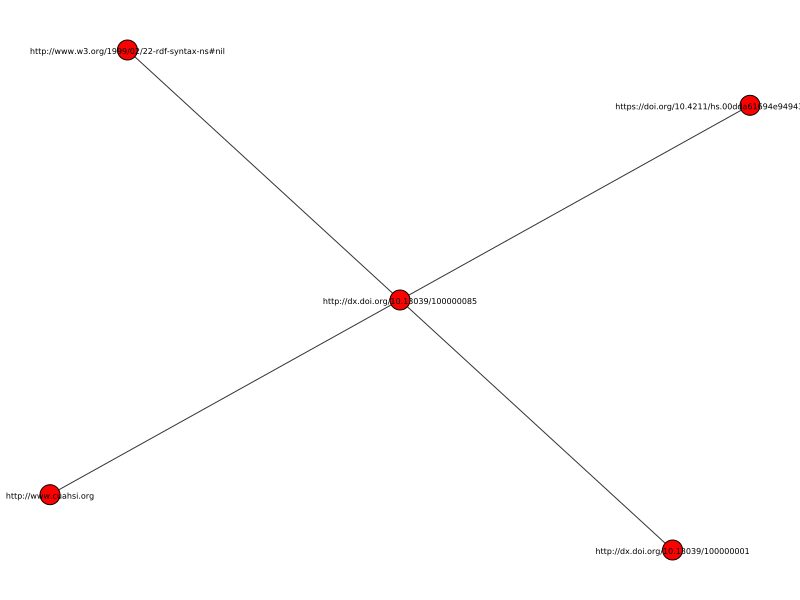

In [52]:
ig.plot(partition, bbox=(800, 600), vertex_label_size=8, margin=50)

## NetworkX exploring

In [53]:
import networkx as nx

sparql3 = """
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
SELECT ?subject ?object
WHERE { 
  ?subject a <https://schema.org/Dataset> .
  ?subject <https://schema.org/creator> ?creator .
  ?creator rdf:first ?o .
  ?o <https://schema.org/name> ?object
}
  """

subgraph = kglab.SubgraphMatrix(kg, sparql3)
nx_graph = subgraph.build_nx_graph(nx.DiGraph(), bipartite=True)